# Determinação dos modos em um guia de ondas #

O código a seguir determina a componente $z$ do campo magnético dos modos presentes em um guia de ondas, através da equação matricial:

$$\left(\frac{1}{k_{0}}{D_{x}}^{2} + n^{2}I\right)[H_{z}] = {n_{eff}}^{2}[H_{z}]$$

Número de autovalores: 200
Número de autovetores: 200


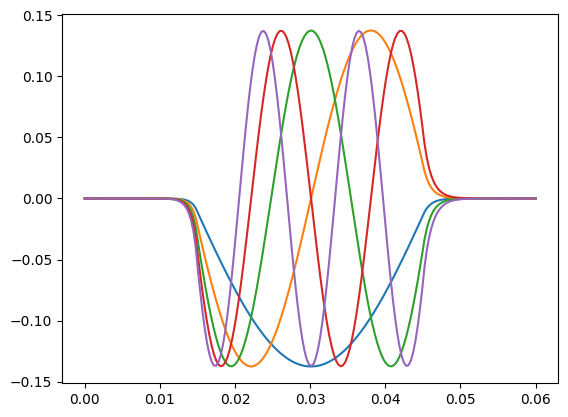

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

lambda_onda = 15e-3

a = 2*lambda_onda
b = lambda_onda
k0 = 2 * np.pi / lambda_onda

N = int(input('Informe o número de divisões da malha: '))
Delta = (a + 2*b)/N

# Fazendo as divisões do guia:

n = np.zeros(N)
n1 = 1
n2 = 3.5
n3 = 2.44

for i in range(0, N // 4, 1):
    n[i] = n1

for i in range(N // 4, 3 * N // 4, 1):
    n[i] = n2

for i in range(3 * N // 4, N, 1):
    n[i] = n3

# Criando a matriz n identidade n:

n = np.diag(n**2)

# Criando a matriz de diferenças finitas:

def Dx2(N):
    D = np.zeros((N,N))
    D[0,0] = -2; D[0,1] = 1
    D[-1,-1] = -2; D[-1,-2] = 1
    for i in range(1,N-1):
        D[i,i] = -2
        D[i,i-1] = 1
        D[i,i+1] = 1
    return D/(Delta**2)

# Definindo o operador linear:

L = 1/(k0**2) * Dx2(N) + n

# Encontrando os autovalores e autovetores do operador linear:

neff2, Hzs = np.linalg.eig(L)
neff2[neff2 < 0] = 0
neff = np.sqrt(neff2)

print(f'Número de autovalores: {neff.shape[0]}')
print(f'Número de autovetores: {Hzs.shape[1]}')

# Plotando os autovetores (componentes Hz dos campos):

D = np.linspace(0, a + 2*b, N)

n_plots = 3
n_plotados = 0

for i in range(0, Hzs.shape[1], 1):
    if neff[i] >= 1:
        plt.plot(D, Hzs[:,i])
        n_plotados += 1
        if n_plotados == n_plots:
            break

plt.show()


